## 1. Problem Framing
Predict a person's **salary** based on **years of experience**.
 
- Input (X): Years of Experience
- Output (Y): Salary
- Type: Supervised Learning (Regression)
 

## 2. Data Collection

In [1]:
import numpy as np
import pandas as pd 

data = pd.read_csv("Salary_Data.csv")
df = pd.DataFrame(data)
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values


## 3. Data Pre-processing

In [2]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv("Salary_Data.csv")

# 2. Initial inspection
print(df.head())
print(df.info())

# 3. Check for duplicate rows
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)

# Remove duplicates if any
df = df.drop_duplicates()

# 4. Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# (Optional) Drop missing values if present
df = df.dropna()

# 5. Ensure correct data types
df["YearsExperience"] = df["YearsExperience"].astype(float)
df["Salary"] = df["Salary"].astype(float)

# 6. Outlier detection using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# 7. Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# 8. Final cleaned dataset info
print("\nCleaned Dataset Info:")
print(df.info())

print("\nCleaned Dataset Preview:")
print(df.head())


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None
Duplicate rows: 0

Missing values:
 YearsExperience    0
Salary             0
dtype: int64

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None

Cleaned Dataset Preview:
   YearsExperience  

## 4. Data Splitting

In [4]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 5. Modeling

In [6]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(X_train, y_train)
 
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

y_pred = model.predict(X_test)
y_pred

Slope (m): 9423.815323030976
Intercept (c): 25321.583011776813


array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

## 6. Evaluating

In [7]:
new_experience = np.array([[7]])
predicted_salary = model.predict(new_experience)
 
print("Predicted salary for 7 years experience:", predicted_salary[0])


Predicted salary for 7 years experience: 91288.29027299365


## 7. Calculating the Error

In [8]:
from sklearn.metrics import mean_squared_error
 
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 49830096.85590839


## 8. Plotting the Graph

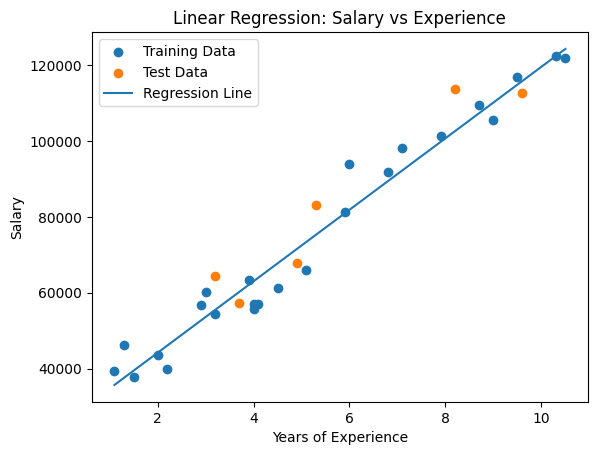

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Training data
plt.scatter(X_train, y_train, label="Training Data")

# Plot Test data
plt.scatter(X_test, y_test, label="Test Data")

# Create a continuous range for regression line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = model.predict(X_range)

# Plot Regression line
plt.plot(X_range, y_range_pred, label="Regression Line")

# Labels and title
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs Experience")

# Legend
plt.legend()

# Show plot
plt.show()
